# This notebook analyzes FVS benchmark results and produces various graphics

In [1]:
#
# Configure these settings to reflect your local setup
#

DATASET="deep1M"

QUERIES_1000="results/benchmarks-%s-q1000.csv" % DATASET

QUERIES_10="results/benchmarks-%s-q10.csv" % DATASET

NUM_APUS=1

MAIN_MEMORY_SIZE = "700G"

PLOT_TITLE="Gemini FVS Benchmarks"

PLOT_SUBTITLE="%s (1M of deep1B), %d APU(s), %s of Host Main Memory" % \
    ( DATASET, NUM_APUS, MAIN_MEMORY_SIZE )

In [2]:
#
# Imports
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#
# Load all the CSV files into dataframes
#

df_q1000 = pd.read_csv( QUERIES_1000 )
print(df_q1000.shape)

df_q10 = pd.read_csv( QUERIES_10 )
print(df_q10.shape)


(15, 12)
(15, 12)


In [4]:
#
# Combine the dataframes into one
#

# augment with a 'num_queries' column
df_q1000['num_queries']=1000

# augment with a 'num_queries' column
df_q10['num_queries']=10

# combine
df_all = pd.concat([ df_q1000, df_q10 ] )
print(df_all.shape)
print(df_all.columns)

(30, 13)
Index(['allocationid', 'datasetid', 'dataset_path', 'queries_path', 'bits',
       'ts_start', 'ts_train_start', 'ts_train_end', 'ts_query_start',
       'ts_query_end', 'response', 'recall', 'num_queries'],
      dtype='object')


In [5]:
#
# Create throughput column
#

df_all['throughput'] = df_all.apply( \
            lambda row: row['num_queries']/row['response'], axis=1 )
    
print(df_all[["num_queries","bits","response","recall", "throughput"]])

    num_queries  bits  response  recall   throughput
0          1000   768  2.915360  0.9997   343.010825
1          1000   768  2.940215  0.9997   340.111132
2          1000   768  2.875883  0.9997   347.719296
3          1000   512  0.887977  0.9997  1126.155282
4          1000   512  0.895868  0.9997  1116.235349
5          1000   512  0.886778  0.9997  1127.677799
6          1000   256  0.611309  0.9994  1635.832701
7          1000   256  0.654820  0.9994  1527.136461
8          1000   256  0.603681  0.9994  1656.502878
9          1000   128  0.641501  0.9899  1558.842928
10         1000   128  0.596934  0.9899  1675.227815
11         1000   128  0.591362  0.9899  1691.011634
12         1000    64  0.450553  0.9455  2219.492523
13         1000    64  0.491143  0.9455  2036.067092
14         1000    64  0.492434  0.9455  2030.729214
0            10   768  0.020478  1.0000   488.334710
1            10   768  0.017423  1.0000   573.953474
2            10   768  0.018164  1.0000   550.

In [6]:
# 
# Grouping rows by (num_queries,bits) and then average 'recall' and 'throughput'
# 

df_plot = \
    df_all[["num_queries","bits","recall","throughput"]].\
        groupby(['num_queries', 'bits'], as_index=False).mean()
print(df_plot)

   num_queries  bits  recall   throughput
0           10    64  0.9700  1332.205698
1           10   128  0.9800   927.241780
2           10   256  1.0000   948.427062
3           10   512  1.0000   476.600367
4           10   768  1.0000   537.607066
5         1000    64  0.9455  2095.429609
6         1000   128  0.9899  1641.694126
7         1000   256  0.9994  1606.490680
8         1000   512  0.9997  1123.356144
9         1000   768  0.9997   343.613751


In [7]:
#
# Extract arrays for plotting
#

q1000_recall = list(df_plot.loc[ df_plot['num_queries']==1000 ]["recall"])
q1000_throughput = list(df_plot.loc[ df_plot['num_queries']==1000 ]["throughput"])

q10_recall = list(df_plot.loc[ df_plot['num_queries']==10 ]["recall"])
q10_throughput = list(df_plot.loc[ df_plot['num_queries']==10 ]["throughput"])


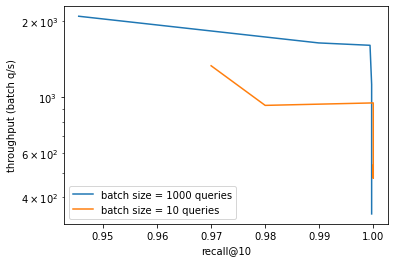

In [8]:
#
# Plot the data
#

plt.plot(q1000_recall, q1000_throughput, label = "batch size = 1000 queries")
plt.plot(q10_recall, q10_throughput, label = "batch size = 10 queries")
plt.legend()
plt.xlabel("recall@10")
plt.ylabel("throughput (batch q/s)")
plt.yscale('log')
#plt.suptitle(PLOT_TITLE, fontsize=18)
#plt.title(PLOT_SUBTITLE)
plt.gcf().subplots_adjust(left=0.15)
plt.savefig("results/gemini_fvs.png")
plt.show()
